In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [247]:
df = pd.read_csv("/content/drive/MyDrive/ecommerce_customer_data_large.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,03-05-2023 21:30,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,16-05-2021 13:57,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,13-07-2020 06:16,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,17-01-2023 13:14,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,01-05-2021 11:29,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,24-01-2023 12:32,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,04-06-2021 05:45,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,10-11-2022 17:11,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,27-06-2021 14:42,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [248]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,03-05-2023 21:30,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,16-05-2021 13:57,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,13-07-2020 06:16,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,17-01-2023 13:14,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,01-05-2021 11:29,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [249]:



df['Returns'] = df['Returns'].fillna(0).astype(int)
df['Returns'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250000 entries, 0 to 249999
Series name: Returns
Non-Null Count   Dtype
--------------   -----
250000 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [250]:
# Convert `Purchase Date` dtype to Datetime
# The original format was incorrect. Changed to  %d-%m-%Y %H:%M
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d-%m-%Y %H:%M')

# Split Year and Month into new columns
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month_name()

df[['Purchase Date','Purchase Year','Purchase Month']]

,Purchase Date,Purchase Year,Purchase Month
0,2023-05-03 21:30:00,2023,May
1,2021-05-16 13:57:00,2021,May
2,2020-07-13 06:16:00,2020,July
3,2023-01-17 13:14:00,2023,January
4,2021-05-01 11:29:00,2021,May
...,...,...,...
249995,2023-01-24 12:32:00,2023,January
249996,2021-06-04 05:45:00,2021,June
249997,2022-11-10 17:11:00,2022,November
249998,2021-06-27 14:42:00,2021,June


In [251]:
df['Total Price'] = df['Product Price'] * df['Quantity']


# Re-order columns
cols = ['Customer ID','Customer Name','Purchase Date','Purchase Year','Purchase Month','Product Category','Product Price','Quantity','Total Price','Payment Method','Returns','Gender','Customer Age','Churn']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       250000 non-null  int64         
 1   Customer Name     250000 non-null  object        
 2   Purchase Date     250000 non-null  datetime64[ns]
 3   Purchase Year     250000 non-null  int32         
 4   Purchase Month    250000 non-null  object        
 5   Product Category  250000 non-null  object        
 6   Product Price     250000 non-null  int64         
 7   Quantity          250000 non-null  int64         
 8   Total Price       250000 non-null  int64         
 9   Payment Method    250000 non-null  object        
 10  Returns           250000 non-null  int64         
 11  Gender            250000 non-null  object        
 12  Customer Age      250000 non-null  int64         
 13  Churn             250000 non-null  int64         
dtypes: d

In [252]:
df.describe(include=['object'])

,Customer Name,Purchase Month,Product Category,Payment Method,Gender
count,250000,250000,250000,250000,250000
unique,39878,12,4,3,2
top,Michael Johnson,August,Electronics,Credit Card,Male
freq,119,23160,62630,83547,125676


In [253]:
df.describe(include='all')

,Customer ID,Customer Name,Purchase Date,Purchase Year,Purchase Month,Product Category,Product Price,Quantity,Total Price,Payment Method,Returns,Gender,Customer Age,Churn
count,250000.000000,250000,250000,250000.000000,250000,250000,250000.000000,250000.000000,250000.000000,250000,250000.000000,250000,250000.000000,250000.00000
unique,NaN,39878,NaN,NaN,12,4,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,Michael Johnson,NaN,NaN,August,Electronics,NaN,NaN,NaN,Credit Card,NaN,Male,NaN,NaN
freq,NaN,119,NaN,NaN,23160,62630,NaN,NaN,NaN,83547,NaN,125676,NaN,NaN
mean,25017.632092,NaN,2021-11-06 19:25:52.835520,2021.377136,NaN,NaN,254.742724,3.004936,765.954660,NaN,0.405904,NaN,43.798276,0.20052
min,1.000000,NaN,2020-01-01 00:07:00,2020.000000,NaN,NaN,10.000000,1.000000,10.000000,NaN,0.000000,NaN,18.000000,0.00000
25%,12590.000000,NaN,2020-12-03 08:09:45,2020.000000,NaN,NaN,132.000000,2.000000,288.000000,NaN,0.000000,NaN,30.000000,0.00000
50%,25011.000000,NaN,2021-11-06 07:38:30,2021.000000,NaN,NaN,255.000000,3.000000,604.000000,NaN,0.000000,NaN,44.000000,0.00000
75%,37441.250000,NaN,2022-10-11 01:21:30,2022.000000,NaN,NaN,377.000000,4.000000,1135.000000,NaN,1.000000,NaN,57.000000,0.00000
max,50000.000000,NaN,2023-09-13 18:42:00,2023.000000,NaN,NaN,500.000000,5.000000,2500.000000,NaN,1.000000,NaN,70.000000,1.00000


# ***PRODUCT CATEGORY ANALYSIS***

In [254]:
product_category_distribution = df['Product Category'].value_counts().reset_index()
product_category_distribution.columns = ['Product Category', 'Count']

# Sort the data by count in descending order
product_category_distribution = product_category_distribution.sort_values(by='Count', ascending=False)
product_category_distribution

,Product Category,Count
0,Electronics,62630
1,Clothing,62581
2,Home,62542
3,Books,62247


In [255]:
# Calculate total sales by product category
product_category_sales = df.groupby('Product Category')['Total Price'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='Total Price', ascending=False)
product_category_sales

,Product Category,Total Price
3,Home,48130856
1,Clothing,47977746
2,Electronics,47801925
0,Books,47578138


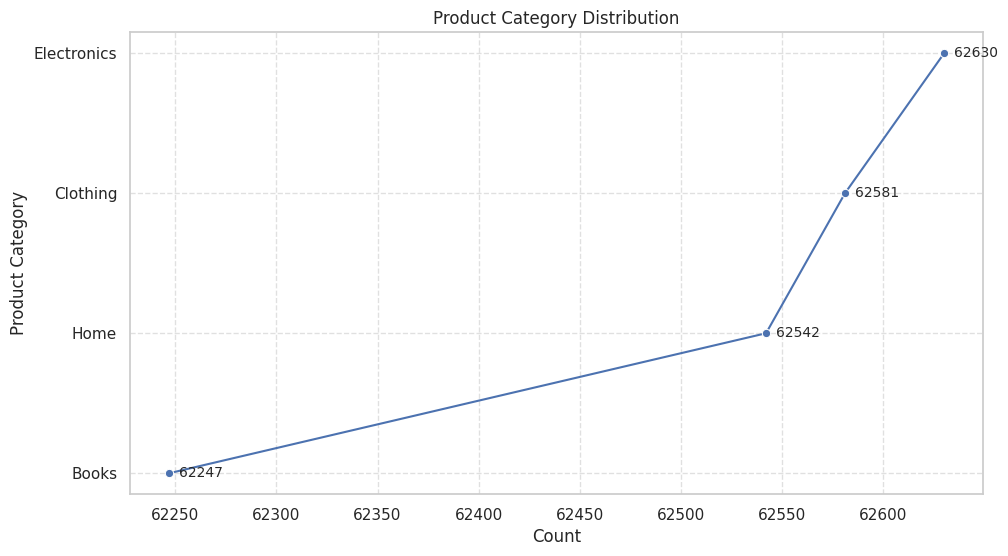

In [256]:
# Create a line chart with count points
plt.figure(figsize=(11, 6))
sns.lineplot(data=product_category_distribution, x='Count', y='Product Category', marker='o')
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.grid(True, linestyle='--', alpha=0.6)

# Add count annotations on the lines
for index, row in product_category_distribution.iterrows():
    plt.text(row['Count'] + 5, index, f'{row["Count"]}', va='center', fontsize=10)

plt.show()

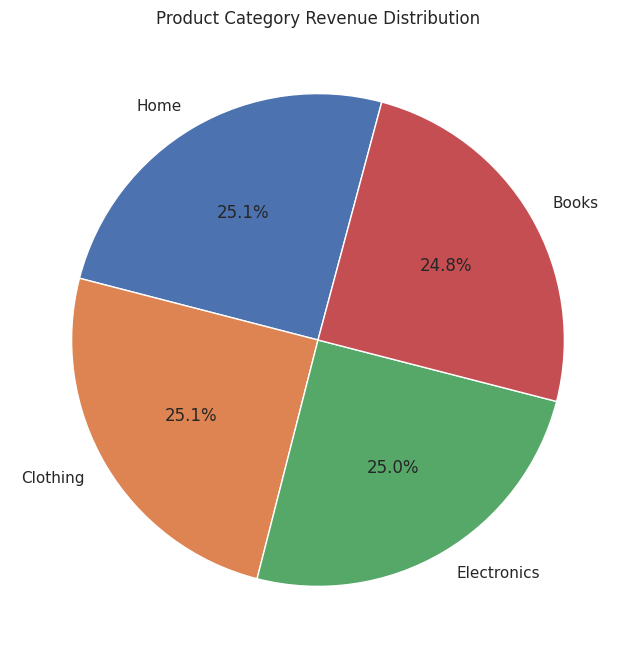

In [257]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_category_sales['Total Price'], labels=product_category_sales['Product Category'], autopct='%1.1f%%', startangle=75)

# Add a title
plt.title('Product Category Revenue Distribution')

# Display the chart
plt.show()


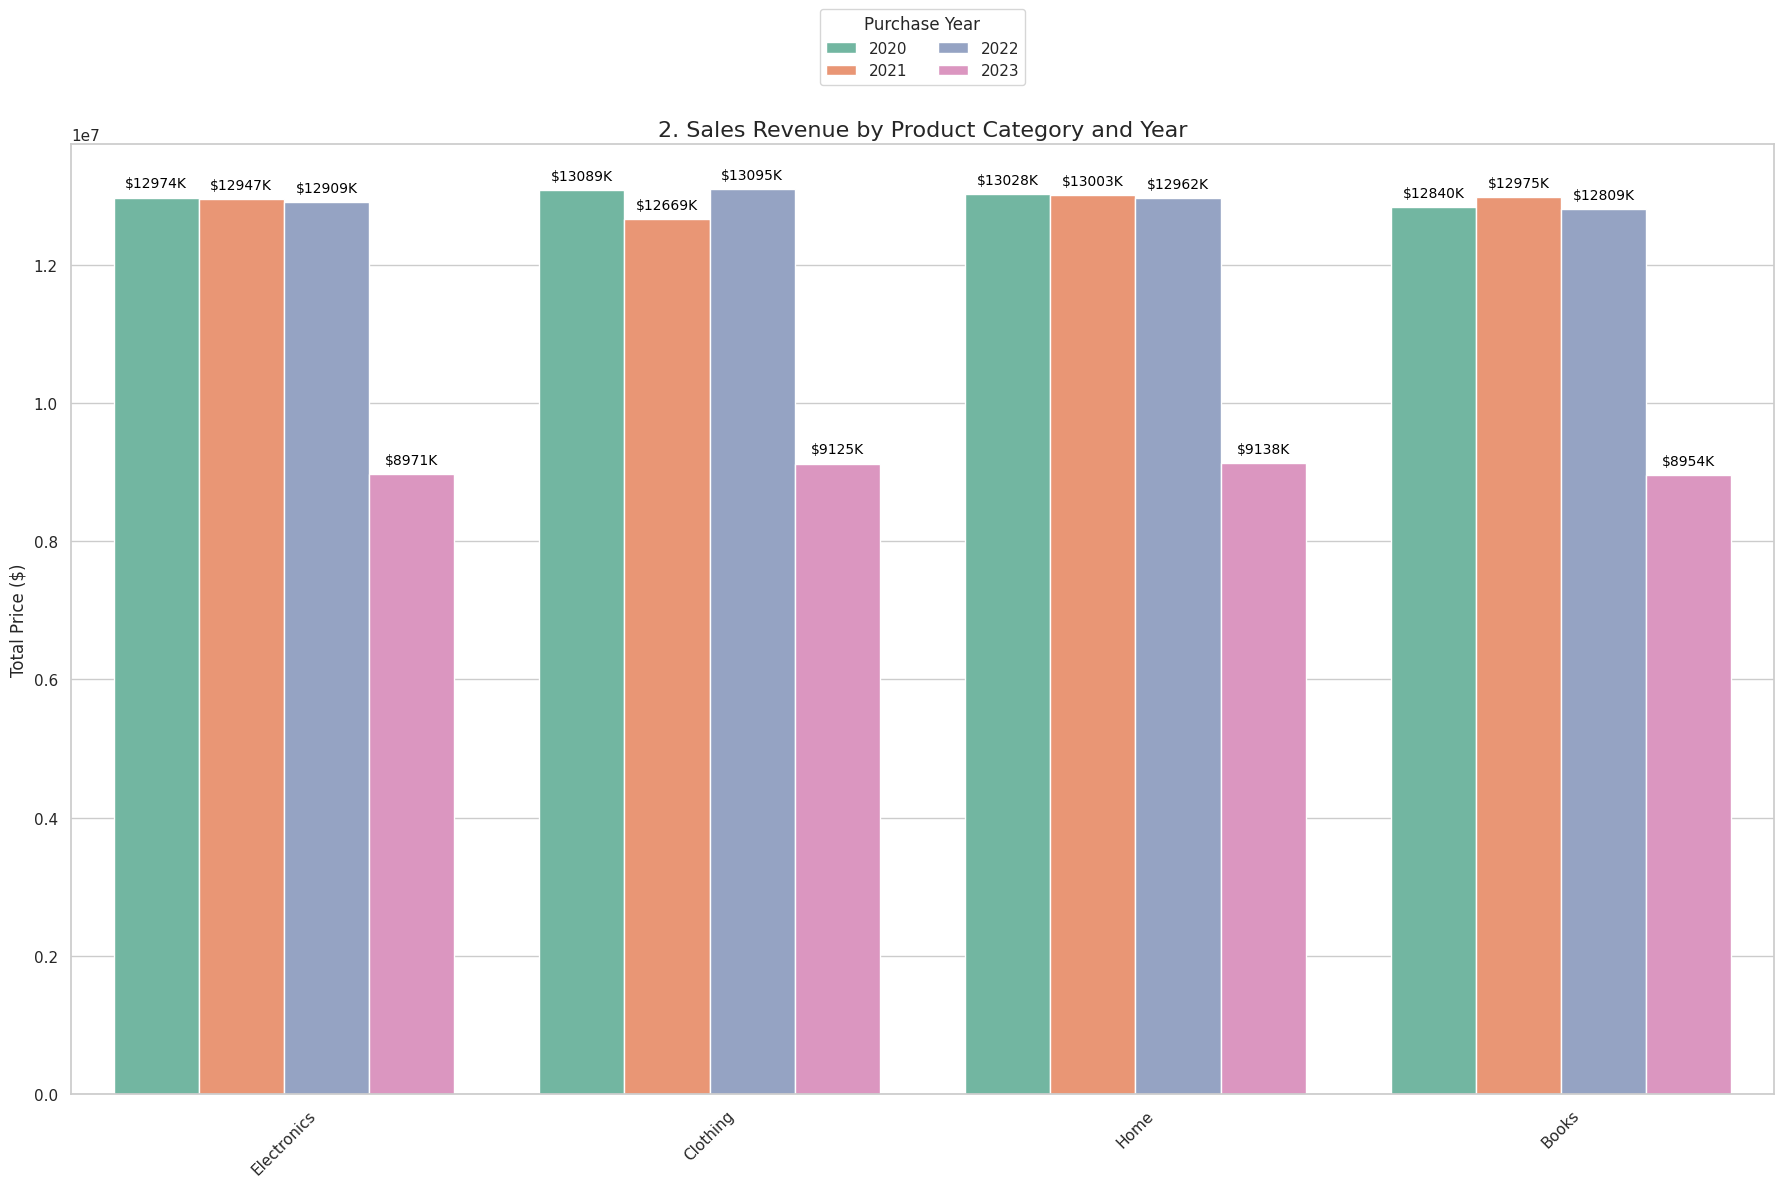

In [258]:
# Prepare the data
category_order = ["Electronics", "Clothing", "Home", "Books"]
total_revenue = df.groupby(['Product Category', 'Purchase Year'])['Total Price'].sum().reset_index()
total_revenue['Purchase Year'] = total_revenue['Purchase Year'].astype(str)  # Ensure 'Purchase Year' is a string

# Create the bar plot with a larger figure size
plt.figure(figsize=(18, 12))
barplot = sns.barplot(data=total_revenue, x='Product Category', y='Total Price',
                      hue='Purchase Year', palette='Set2', order=category_order)

# Add labels on top of each bar in 100K format
for p in barplot.containers:
    barplot.bar_label(p, labels=[f"${v/1e3:.0f}K" for v in p.datavalues],
                      label_type='edge', padding=5, fontsize=10, color='black', rotation=0)

# Customize the plot
plt.title('2. Sales Revenue by Product Category and Year', fontsize=16)
plt.xlabel(None)
plt.ylabel('Total Price ($)')
plt.legend(title='Purchase Year', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## *RETURN ANALYSIS*

In [259]:
return_rate = df['Returns'].mean()
print(f'Return Rate: {return_rate:.2%}')


Return Rate: 40.59%


In [260]:
total_lost_revenue = df[df['Returns'] == 1]['Total Price'].sum()
print(f'Total Lost Revenue due to Returns: ${total_lost_revenue:.2f}')

Total Lost Revenue due to Returns: $78161640.00


In [261]:
returned_data = df[df['Returns'] == 1]
not_returned_data = df[df['Returns'] == 0]

# Step 2: Analyze return rates by product category
return_rate_by_category = returned_data['Product Category'].value_counts() / df['Product Category'].value_counts()
return_rate_by_category

,count
Product Category,
Books,0.408148
Clothing,0.404308
Electronics,0.406323
Home,0.404848


# ***GENDER ANLYSIS***

In [262]:
#stats of Gender and total price spent
gender_summary = df.groupby('Gender').agg(total_count=('Customer ID','size'),
                                            min_amount=('Total Price', 'min'),
                                            max_amount=('Total Price', 'max'),
                                            median_amount=('Total Price','median'),
                                            total_amount=('Total Price','sum'),
                                            average_amount =('Total Price','mean'),
                                            total_returned=('Returns','sum'),
                                            return_rates=('Returns','mean'),
                                            total_churned=('Churn','sum'),
                                            churn_rates=('Churn','mean')).reset_index()

gender_summary

,Gender,total_count,min_amount,max_amount,median_amount,total_amount,average_amount,total_returned,return_rates,total_churned,churn_rates
0,Female,124324,10,2500,605.0,95363311,767.054720,50284,0.404459,25067,0.201626
1,Male,125676,10,2500,604.0,96125354,764.866434,51192,0.407333,25063,0.199426


Text(0.5, 0.9, '1. Gender Distribution')

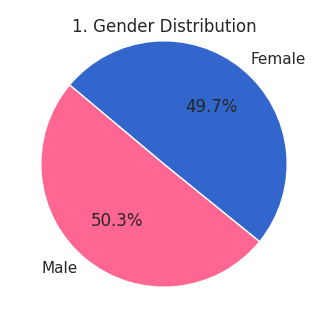

In [263]:
gender_count = df['Gender'].value_counts()
colors = ['#FF6692', '#3366CC']
plt.figure(figsize=(4, 4))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('1. Gender Distribution', y=0.9)


<ipython-input-264-9628345400c8>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




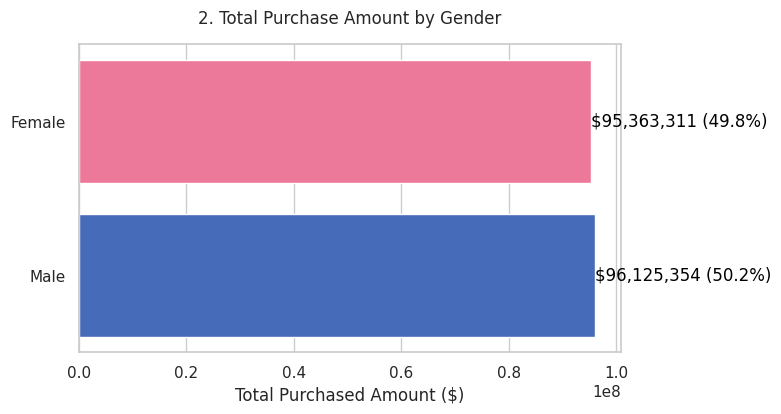

In [264]:
sum_amount = gender_summary['total_amount'].sum()
gender_summary['total_amount_percentage'] = (gender_summary['total_amount'] / sum_amount * 100).round(2)

plt.figure(figsize=(7, 4))
sns.barplot(data=gender_summary, x='total_amount', y='Gender', palette={'Female': '#FF6692', 'Male': '#3366CC'})
for index, row in gender_summary.iterrows():
    plt.text(row['total_amount'], index, f"${row['total_amount']:,} ({row['total_amount_percentage']}%)",
             color='black', ha='left', va='center')
plt.title('2. Total Purchase Amount by Gender', pad=15)
plt.xlabel('Total Purchased Amount ($)')
plt.ylabel(None)
plt.show()


# ***AGE ANALYSIS***

In [265]:
age_bins = [0,9,19,29,39,49,59,69,np.inf]
age_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)
df[['Customer ID','Customer Age','Age Group']].sort_values('Customer Age', ascending=False)

<ipython-input-265-03d909fe1bbd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,Customer Age,Age Group
213450,27866,70,70+
76898,27353,70,70+
76896,27353,70,70+
76895,27353,70,70+
239854,5761,70,70+
...,...,...,...
157044,44571,18,10-19
83330,12369,18,10-19
93626,8277,18,10-19
93625,8277,18,10-19


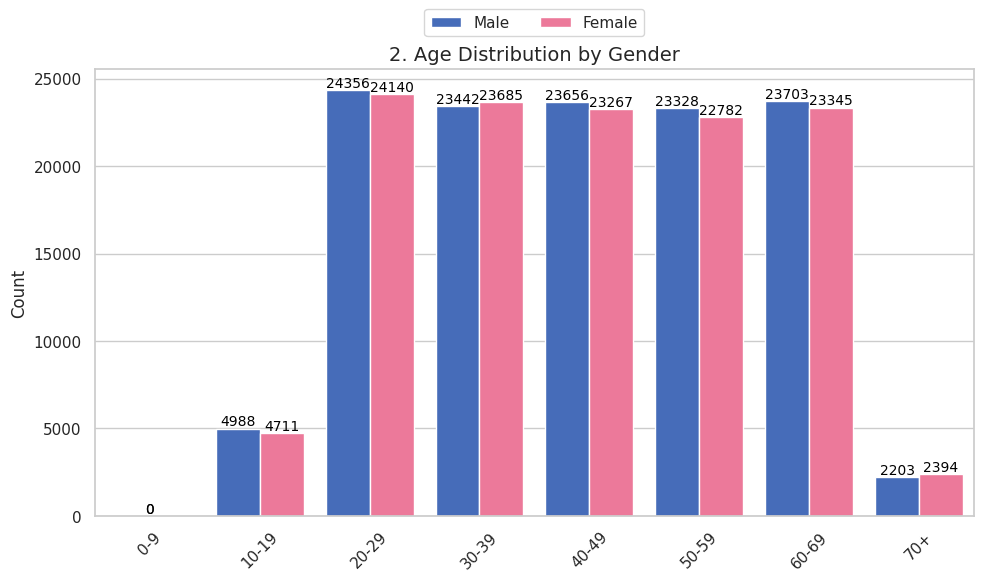

In [266]:
# Prepare the data
age_group_gender_count = df[['Gender', 'Age Group']].value_counts().reset_index(name='Count')
age_group_gender_count.columns = ['Gender', 'Age Group', 'Count']

# Set the order of the Age Group categories if not already ordered
age_group_gender_count['Age Group'] = pd.Categorical(age_group_gender_count['Age Group'], categories=age_labels, ordered=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_group_gender_count, x='Age Group', y='Count', hue='Gender',
                      palette={'Female': '#FF6692', 'Male': '#3366CC'})

# Add labels on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=10, xytext=(0, 5),
                     textcoords='offset points', color='black')

# Customize the plot
plt.title('2. Age Distribution by Gender', fontsize=14)
plt.xlabel(None)
plt.ylabel('Count')
plt.legend(title=None, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

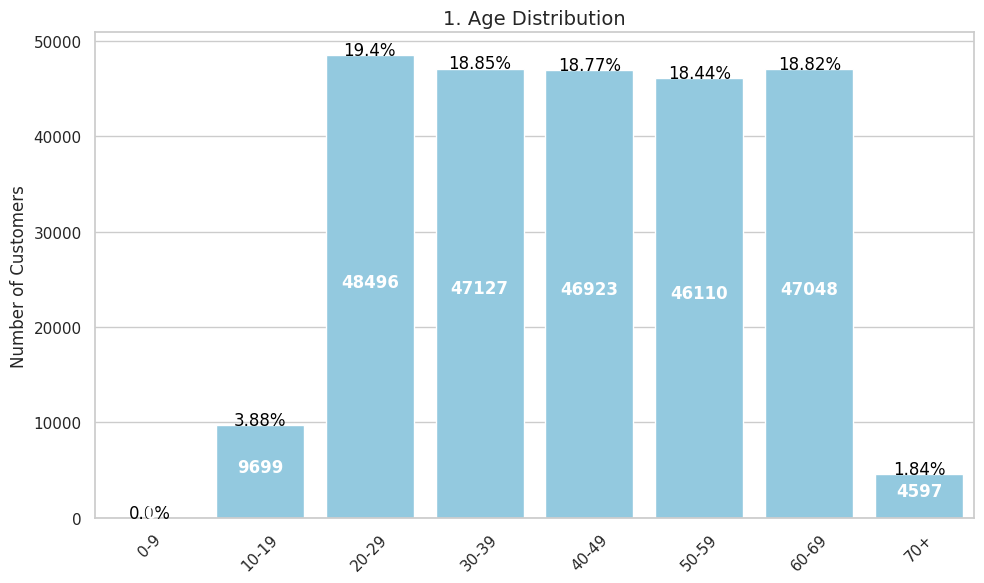

In [267]:
# Create figure and set size
plt.figure(figsize=(10, 6))

# Set the order of the categorical Age Group column
age_group_count = df['Age Group'].value_counts().sort_index().reset_index(name='Count')
age_group_count.columns = ['Age Group', 'Count']

# Calculate the percentage for each age group
age_group_count['Percentage'] = round(age_group_count['Count'] / age_group_count['Count'].sum() * 100, 2)
age_group_count['Percentage Text'] = age_group_count['Percentage'].astype(str) + '%'

# Plot barplot with count data
sns.barplot(data=age_group_count, x='Age Group', y='Count', color='skyblue')

# Add percentage labels on top of bars
for index, row in age_group_count.iterrows():
    plt.text(index, row['Count'] + 2, f"{row['Percentage Text']}", color='black', ha="center")
    plt.text(index, row['Count'] / 2, f"{row['Count']}", color='white', ha="center", weight="bold")

# Customize the plot
plt.title('1. Age Distribution', fontsize=14)
plt.xlabel(None)
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# ***TIME SERIES ANALYSIS***

In [268]:
# overview of yearly sales revenue
annual_sales_summary = df.groupby('Purchase Year')['Total Price'].agg(['min', 'max','mean','median','sum',])
annual_sales_summary

,min,max,mean,median,sum
Purchase Year,,,,,
2020,10,2500,766.229627,604.0,51931213
2021,10,2500,765.467205,608.0,51594786
2022,10,2500,766.071850,600.0,51774966
2023,10,2500,766.088024,604.0,36187700


In [269]:
# Set month names in order and dtype to category
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Purchase Month'] = pd.Categorical(df['Purchase Month'],
                                        categories=month_order,
                                        ordered=True)

# Calculate the total and average of monthly sales revenue
monthly_sales =df.groupby(['Purchase Year', 'Purchase Month']).agg(Count=('Customer ID', 'size'),
                                                                      Total_Revenue=('Total Price', 'sum'),
                                                                      Avg_Revenue=('Total Price', 'mean')).reset_index()

<ipython-input-269-9c413c1f9546>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-269-9c413c1f9546>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



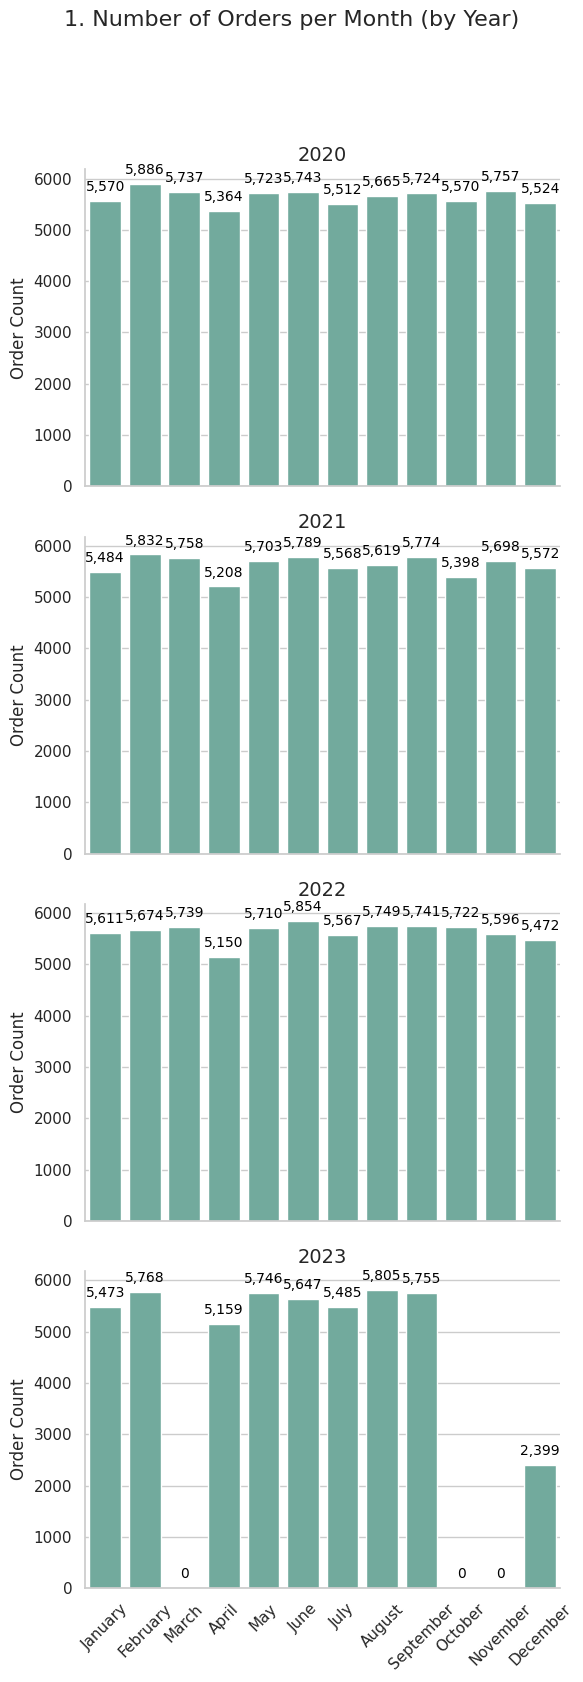

In [270]:
# Ensure Purchase Year is treated as a string
monthly_sales['Purchase Year'] = monthly_sales['Purchase Year'].astype(str)

# Create a FacetGrid for each year, split by 'Purchase Year'
g = sns.FacetGrid(monthly_sales, col='Purchase Year', col_wrap=1, height=4, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x='Purchase Month', y='Count', color='#69b3a2', order=sorted(monthly_sales['Purchase Month'].unique()))

# Add labels on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Customize the plot
g.set_titles("{col_name}", size=14)
g.set_axis_labels("", "Order Count")
g.fig.suptitle('1. Number of Orders per Month (by Year)', fontsize=16, y=1.05)
g.set_xticklabels(month_order,rotation=45)
g.tight_layout()

# Show the plot
plt.show()


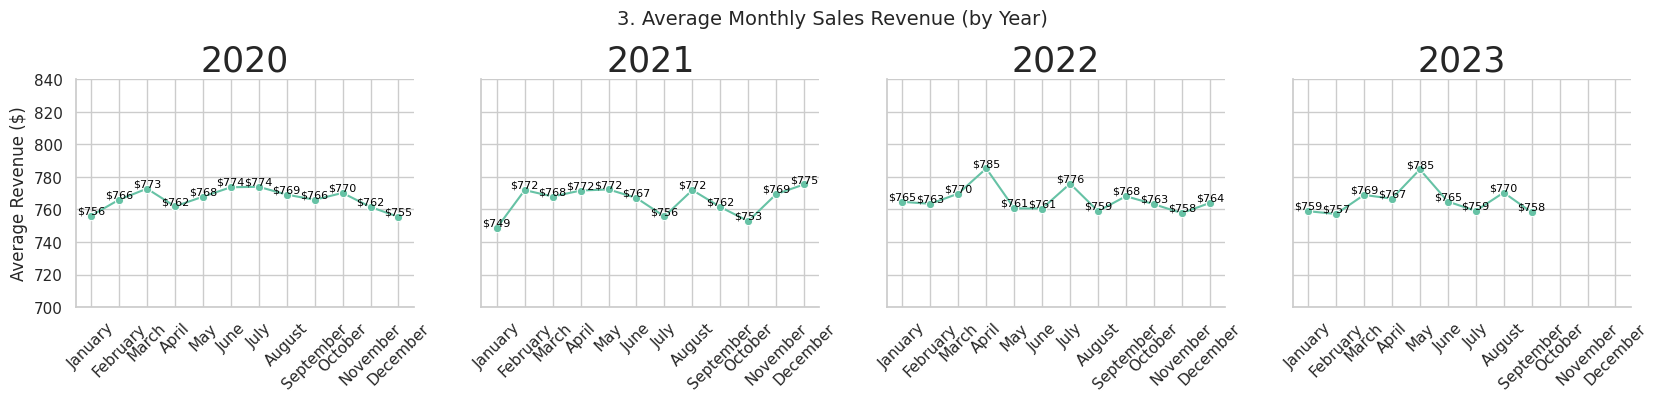

In [271]:
# Ensure 'Purchase Year' is treated as a string
monthly_sales['Purchase Year'] = monthly_sales['Purchase Year'].astype(str)

# Set the plot style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Create a FacetGrid for average monthly sales per year
g = sns.FacetGrid(monthly_sales, col='Purchase Year', height=3.5, aspect=1.2, sharey=True)
g.map_dataframe(sns.lineplot, x='Purchase Month', y='Avg_Revenue', marker='o', color=palette[0])

# Add labels for each data point
for ax in g.axes.flat:
    for line in ax.get_lines():
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            ax.text(x, y, f"${y:,.0f}", ha='center', va='bottom', fontsize=8, color='black')

# Customize the plot
g.set_titles("{col_name}", size=25)
g.set_axis_labels("", "Average Revenue ($)")
g.fig.suptitle('3. Average Monthly Sales Revenue (by Year)', fontsize=14, y=1.05)
g.set_xticklabels(rotation=45)
g.set(ylim=(700, 840))  # Set y-axis range to match Plotly

# Adjust layout
plt.subplots_adjust(top=0.85, wspace=0.2)
plt.show()


# ***CHURN ANALYSIS***

In [272]:
# Calculate churn rate
churn_rate = (df['Churn'].sum() / len(df['Churn'])) * 100
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 20.05%


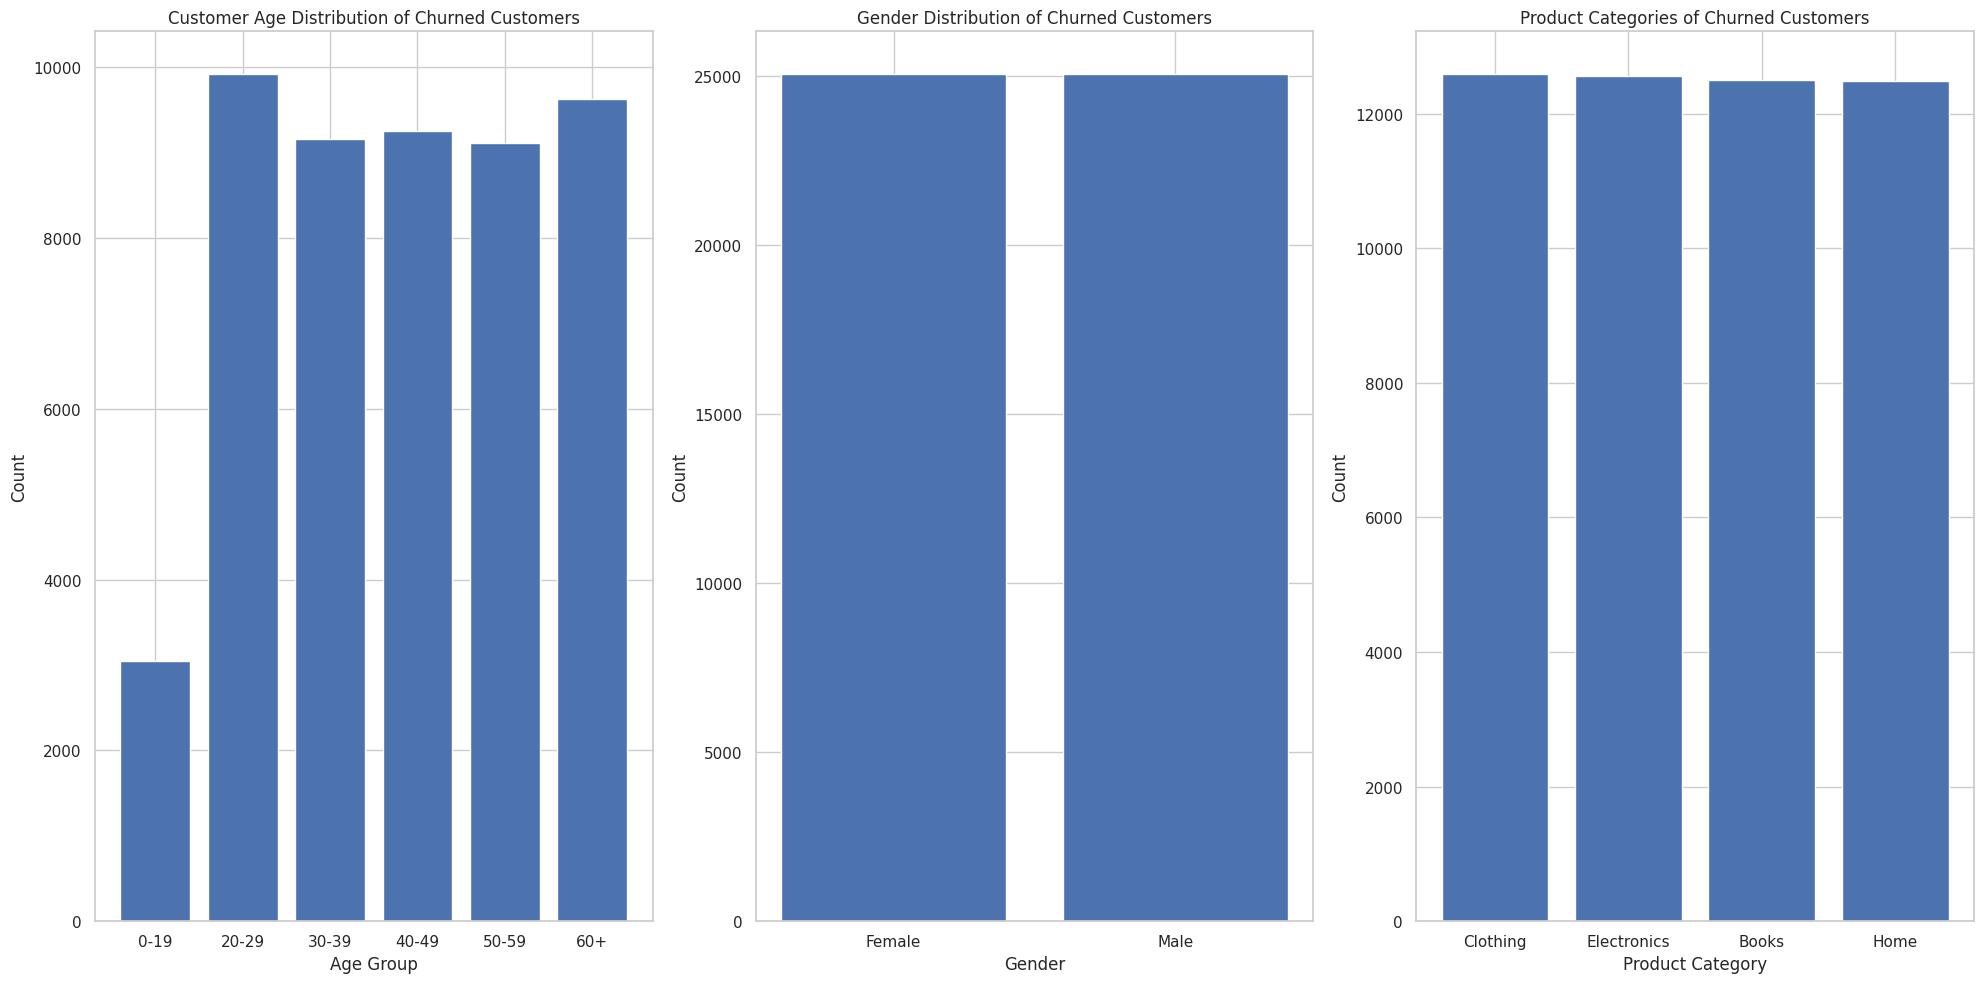

In [273]:
# Filter churned customers (assuming 'Churn' column with values 0 for retained, 1 for churned)
churned_customers = df[df['Churn'] == 1]

# Analyze common characteristics of churned customers
churned_customer_info = churned_customers[['Customer ID', 'Total Price', 'Product Category', 'Customer Age', 'Gender']]

# Define age ranges and labels
age_ranges = [0, 20, 30, 40, 50, 60, 100]  # Example age ranges
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']  # Corresponding labels


# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot Customer Age Distribution with age bins
churned_age_bins = pd.cut(churned_customer_info['Customer Age'], bins=age_ranges, labels=age_labels)
age_counts = churned_age_bins.value_counts().reindex(age_labels, fill_value=0)
axes[0].bar(age_counts.index, age_counts.values)
axes[0].set_title('Customer Age Distribution of Churned Customers')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot Gender Distribution
churned_gender_counts = churned_customer_info['Gender'].value_counts()
axes[1].bar(churned_gender_counts.index, churned_gender_counts.values)
axes[1].set_title('Gender Distribution of Churned Customers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot Product Category Distribution
churned_product_category_counts = churned_customer_info['Product Category'].value_counts()
axes[2].bar(churned_product_category_counts.index, churned_product_category_counts.values)
axes[2].set_title('Product Categories of Churned Customers')
axes[2].set_xlabel('Product Category')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# **PAYMENT METHOD ANALYSIS**

In [274]:
payment_count_returns = df.groupby('Payment Method').agg(total_count=('Customer ID','size'),
                                                     total_return=('Returns','sum'),
                                                     return_rates=('Returns','mean')).reset_index()

payment_count_returns['percentage'] = payment_count_returns['total_count']/payment_count_returns['total_count'].sum()*100
payment_count_returns['return_rates'] *= 100

payment_count_returns[['Payment Method','total_count','percentage','total_return','return_rates']]

,Payment Method,total_count,percentage,total_return,return_rates
0,Cash,83012,33.2048,33686,40.579675
1,Credit Card,83547,33.4188,33858,40.525692
2,PayPal,83441,33.3764,33932,40.665860


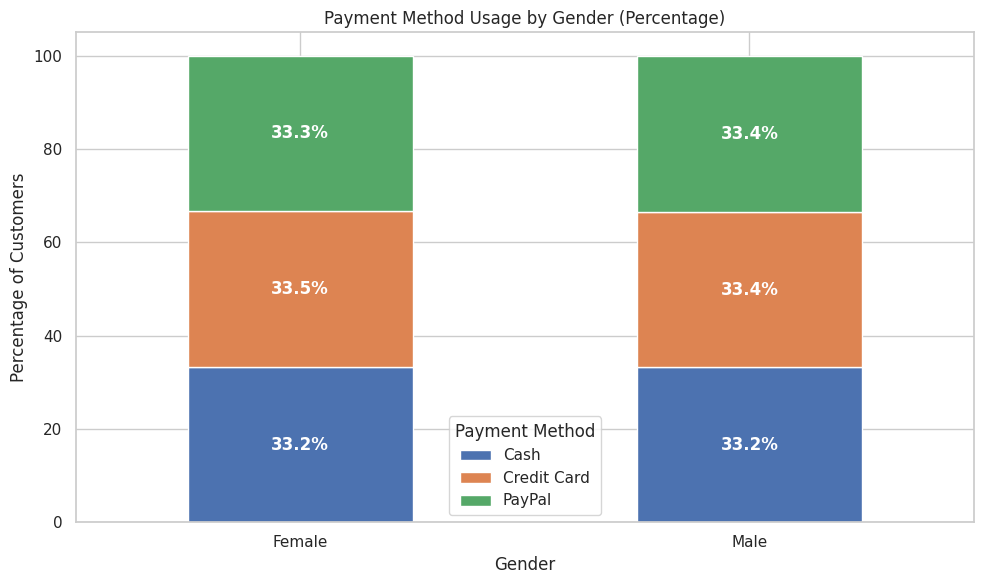

In [275]:
payment_by_gender = df.groupby(['Gender', 'Payment Method'])['Customer ID'].count().unstack()

# Calculate percentages for each payment method within each gender
payment_by_gender_pct = payment_by_gender.div(payment_by_gender.sum(axis=1), axis=0) * 100

# Create the bar plot
payment_by_gender_pct.plot(kind='bar', figsize=(10, 6), stacked=True)

# Add labels and title
plt.title('Payment Method Usage by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')

for i in range(len(payment_by_gender_pct)):
    for j in range(len(payment_by_gender_pct.columns)):
      value = payment_by_gender_pct.iloc[i,j]
      if value > 0:
        plt.text(i, payment_by_gender_pct.iloc[i,:].cumsum().iloc[j] - value/2, f'{value:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()




# ***CUSTOMER SEGMENTATON***

In [276]:
# Calculate each customer's CLV
# Start with grouping data by customer's ID and sum their total order num and purchase amount
customer_df = df.groupby(['Customer ID','Customer Name']).agg(
                order_count=('Customer ID', 'size'),
                total_revenue=('Total Price', 'sum'),
                avg_purchase_value=('Total Price','mean'),
                return_num=('Returns', 'sum'),
                churned=('Churn','sum')).reset_index()

# Re-assign churned values into boolean 1,0 based on the condition
customer_df['churned'] = customer_df['churned'].apply(lambda x: 1 if x >= 1 else 0)
customer_df

,Customer ID,Customer Name,order_count,total_revenue,avg_purchase_value,return_num,churned
0,1,Dominic Cline,3,5600,1866.666667,0,0
1,2,Crystal Day,6,6459,1076.500000,4,0
2,3,Joseph Perez,4,3613,903.250000,0,0
3,4,Wyatt Love,5,4339,867.800000,3,0
4,5,Shannon Hoffman,5,2263,452.600000,3,0
...,...,...,...,...,...,...,...
49656,49996,Cindy Holden,7,6107,872.428571,2,0
49657,49997,Anita Gardner,2,1592,796.000000,0,0
49658,49998,Tracy Smith,10,8440,844.000000,6,1
49659,49999,Laura Burgess,6,4188,698.000000,3,0


In [277]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Calculate average purchase frequency (APF) per customer
customer_df['avg_purchase_freq'] = customer_df['order_count'] / len(customer_df)

# Calculate the average customer lifespan
# Calculate the difference between each customer's the first and last purchase date
customer_lifespans = df.groupby('Customer ID')['Purchase Date'].apply(lambda x: (x.max() - x.min()).days)
avg_lifespan_days = round(customer_lifespans.mean(), 1)

print(f"Customer Average Lifespan: {avg_lifespan_days:.1f} days")

<ipython-input-277-802fa92ba5dc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Customer Average Lifespan: 828.4 days


In [278]:
# Calculate customer value for each customer
customer_df['customer_value'] = customer_df['avg_purchase_value'] * customer_df['avg_purchase_freq']

# Then calculate the final Customer Lifetime Value (CLV)
customer_df['CLV'] = customer_df['customer_value'] * avg_lifespan_days

customer_df.head()

,Customer ID,Customer Name,order_count,total_revenue,avg_purchase_value,return_num,churned,avg_purchase_freq,customer_value,CLV
0,1,Dominic Cline,3,5600,1866.666667,0,0,0.000060,0.112765,93.414148
1,2,Crystal Day,6,6459,1076.500000,4,0,0.000121,0.130062,107.743211
2,3,Joseph Perez,4,3613,903.250000,0,0,0.000081,0.072753,60.268807
3,4,Wyatt Love,5,4339,867.800000,3,0,0.000101,0.087372,72.379284
4,5,Shannon Hoffman,5,2263,452.600000,3,0,0.000101,0.045569,37.749324


In [279]:
# Re-order columns and create a summary stat for CLV
customer_df = customer_df[['Customer ID','Customer Name','churned','return_num','order_count',
                           'total_revenue','avg_purchase_value','avg_purchase_freq',
                           'customer_value','CLV']]
customer_df.describe()

,Customer ID,churned,return_num,order_count,total_revenue,avg_purchase_value,avg_purchase_freq,customer_value,CLV
count,49661.000000,49661.000000,49661.000000,49661.000000,49661.000000,49661.000000,49661.000000,49661.000000,49661.000000
mean,24993.104488,0.199936,2.043374,5.034131,3855.916413,765.418793,0.000101,0.077645,64.320919
std,14434.429306,0.399956,1.413121,2.199399,2144.105477,299.340938,0.000044,0.043175,35.766033
min,1.000000,0.000000,0.000000,1.000000,11.000000,11.000000,0.000020,0.000222,0.183492
25%,12494.000000,0.000000,1.000000,3.000000,2271.000000,559.600000,0.000060,0.045730,37.882773
50%,24987.000000,0.000000,2.000000,5.000000,3584.000000,745.500000,0.000101,0.072169,59.785055
75%,37492.000000,0.000000,3.000000,6.000000,5154.000000,943.500000,0.000121,0.103784,85.974378
max,50000.000000,1.000000,10.000000,17.000000,17448.000000,2500.000000,0.000342,0.351342,291.051795


In [280]:
# Segment customers into High, Medium, and Low
# Define cutoff points by 25th and 75th percentile
clv_summary = customer_df['CLV'].describe()
high_cutoff = clv_summary['75%']  # Extract data point for 75th percentile
low_cutoff = clv_summary['25%']   # Extract data point for 25th percentile

# Assign segment labels based on CLV values
def assign_segment(clv):
    if clv >= high_cutoff:
        return 'High'
    elif clv >= low_cutoff:
        return 'Medium'
    else:
        return 'Low'

# Apply segment assignment to each row in the DataFrame
customer_df['Segment'] = customer_df['CLV'].apply(assign_segment)

customer_df.sort_values(by='CLV', ascending=False).head(10)

<ipython-input-280-37a5b3acdca8>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,Customer Name,churned,return_num,order_count,total_revenue,avg_purchase_value,avg_purchase_freq,customer_value,CLV,Segment
6310,6347,Lori Taylor,0,8,14,17448,1246.285714,0.000282,0.351342,291.051795,High
32210,32420,Jeffrey Jones,0,4,12,15538,1294.833333,0.000242,0.312881,259.190898,High
25164,25324,Jennifer Valdez,0,5,11,15184,1380.363636,0.000222,0.305753,253.285790,High
5771,5802,Mary Cunningham,1,5,12,15049,1254.083333,0.000242,0.303035,251.033841,High
40656,40930,Michael Neal,0,5,14,14948,1067.714286,0.000282,0.301001,249.349051,High
41518,41800,Richard Stephens,0,2,14,14720,1051.428571,0.000282,0.296410,245.545760,High
42155,42442,Jeffrey Brown,0,2,10,14420,1442.000000,0.000201,0.290369,240.541431,High
22609,22752,Jill Reeves,0,6,10,14283,1428.300000,0.000201,0.287610,238.256120,High
40593,40866,Christine Herman,0,7,12,14207,1183.916667,0.000242,0.286080,236.988357,High
34287,34514,Stacy Meyer,0,5,13,14140,1087.692308,0.000262,0.284730,235.870724,High


In [281]:
# use merge to join data based on `Customer ID` in customer_df
df = df.merge(customer_df[['Customer ID','Segment']], on='Customer ID', how='left')

# Rename the 'Segment' column to avoid conflicts
df.rename(columns={'Segment':'Segment Tier'}, inplace=True)

# Check for any missing values after join
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       250000 non-null  int64         
 1   Customer Name     250000 non-null  object        
 2   Purchase Date     250000 non-null  datetime64[ns]
 3   Purchase Year     250000 non-null  int32         
 4   Purchase Month    250000 non-null  category      
 5   Product Category  250000 non-null  object        
 6   Product Price     250000 non-null  int64         
 7   Quantity          250000 non-null  int64         
 8   Total Price       250000 non-null  int64         
 9   Payment Method    250000 non-null  object        
 10  Returns           250000 non-null  int64         
 11  Gender            250000 non-null  object        
 12  Customer Age      250000 non-null  int64         
 13  Churn             250000 non-null  int64         
 14  Age 

In [282]:
# Calculate the total count/order/sales/churn and averages
segment_summary = customer_df.groupby('Segment').agg(Total_Count=('Segment', 'size'),
                                               Total_Order_Count=('order_count', 'sum'),
                                               Total_Revenue=('total_revenue','sum'),
                                               Average_Revenue=('total_revenue','mean'),
                                               Total_Churned=('churned', 'sum'),
                                               Churn_Rates=('churned','mean'),
                                               Total_Return_Num=('return_num','sum')).reset_index()
# Calculate return rates for each segment
segment_summary['Return_Rates'] = segment_summary['Total_Return_Num'] / segment_summary['Total_Order_Count']

segment_summary

,Segment,Total_Count,Total_Order_Count,Total_Revenue,Average_Revenue,Total_Churned,Churn_Rates,Total_Return_Num,Return_Rates
0,High,12416,90887,84189209,6780.703044,2482,0.199903,36850,0.405449
1,Low,12415,36321,17362509,1398.510592,2436,0.196214,14663,0.403706
2,Medium,24830,122792,89936947,3622.108216,5011,0.201812,49963,0.406891


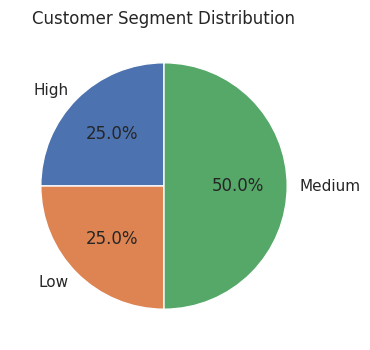

In [283]:
# Data for the pie chart
segments = segment_summary['Segment']
counts = segment_summary['Total_Count']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=segments, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Distribution')
plt.show()

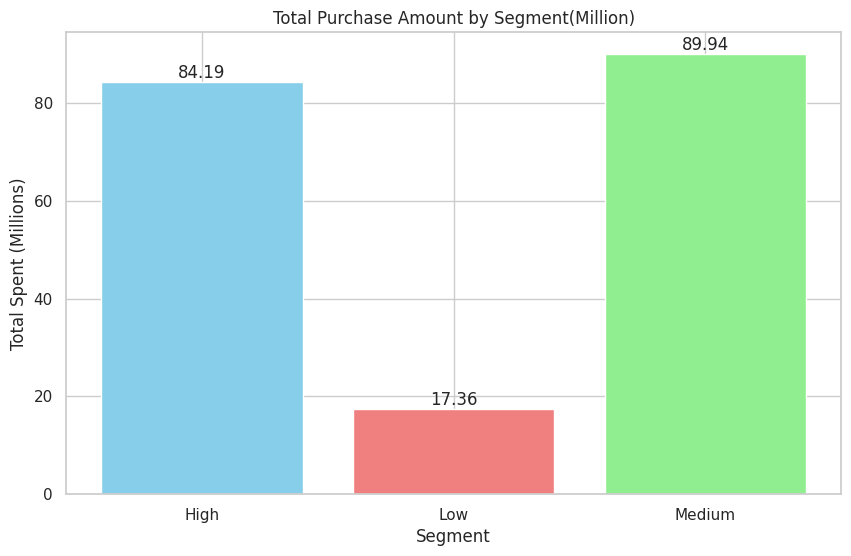

In [284]:
#BAR PLOT
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_summary['Segment'], segment_summary['Total_Revenue'] / 1000000, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Segment")
plt.ylabel("Total Spent (Millions)")
plt.title("Total Purchase Amount by Segment(Million)")

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

<ipython-input-285-ac80491a63ba>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



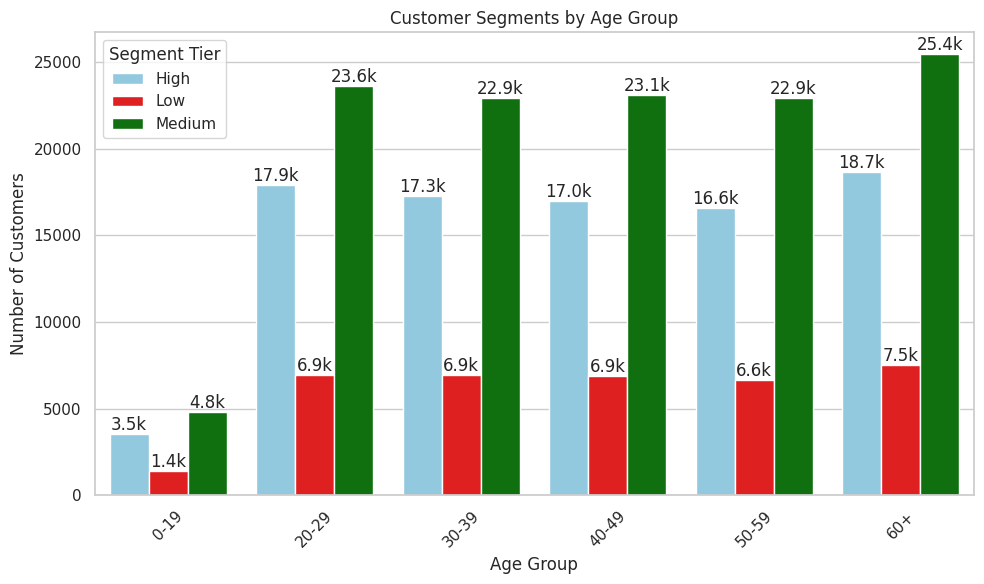

In [285]:
#barplot

age_ranges = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']

df['Age Group'] = pd.cut(df['Customer Age'], bins=age_ranges, labels=age_labels, right=False)

# Group data by segment and age group, then count occurrences
segment_age_counts = df.groupby(['Segment Tier', 'Age Group'])['Customer ID'].count().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Customer ID', hue='Segment Tier', data=segment_age_counts, palette=['skyblue', 'red', 'green'])
plt.title('Customer Segments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# Add customer count labels on each bar in 'k' format
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid errors for zero counts
        plt.gca().text(p.get_x() + p.get_width()/2., height + 3, f'{height/1000:.1f}k', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.legend(title='Segment Tier')
plt.tight_layout()
plt.show()

# ***CLUSTERING***

In [286]:
df = pd.read_csv("/content/drive/MyDrive/updated_dataset_with_clusters.csv")
df

,Customer ID,Customer Name,Purchase Date,Purchase Year,Purchase Month,Product Category,Product Price,Quantity,Total Price,Payment Method,Returns,Gender,Customer Age,Churn
0,44605,John Rivera,2023-05-03 21:30:02,2023,May,Home,177,1,177,PayPal,1,Female,31,0
1,44605,John Rivera,2021-05-16 13:57:44,2021,May,Electronics,174,3,522,PayPal,1,Female,31,0
2,44605,John Rivera,2020-07-13 06:16:57,2020,July,Books,413,1,413,Credit Card,1,Female,31,0
3,44605,John Rivera,2023-01-17 13:14:36,2023,January,Electronics,396,3,1188,Cash,0,Female,31,0
4,44605,John Rivera,2021-05-01 11:29:27,2021,May,Books,259,4,1036,PayPal,1,Female,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,Gabriel Williams,2023-01-24 12:32:18,2023,January,Home,436,1,436,Cash,0,Male,63,0
249996,20455,Barry Foster,2021-06-04 05:45:25,2021,June,Electronics,233,1,233,Credit Card,1,Female,66,0
249997,28055,Lisa Johnson,2022-11-10 17:11:57,2022,November,Electronics,441,5,2205,Cash,0,Female,63,0
249998,15023,Melissa Fernandez,2021-06-27 14:42:12,2021,June,Electronics,44,2,88,Cash,1,Male,64,0


   Cluster  Total Purchases  Average Purchase Amount  Total Returns  \
0        0      7876.699646               969.472676       3.914600   
1        1      3118.147819               655.311610       1.794513   

   Churn Status  
0      0.418639  
1      0.131675  


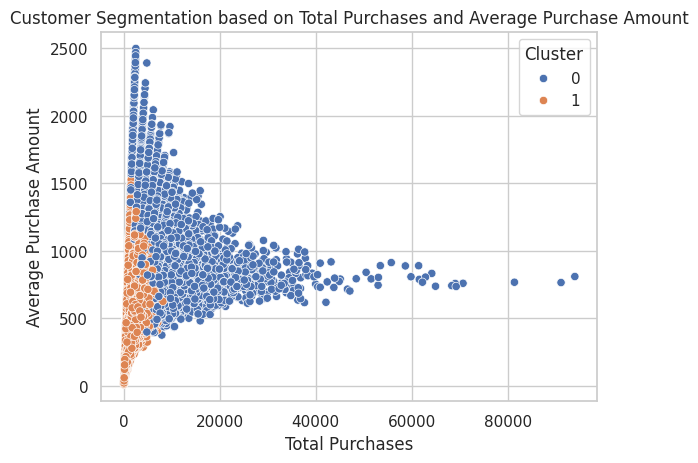

In [287]:
#KMEANS
customer_data = df.groupby('Customer Name').agg({
    'Total Price': ['sum', 'mean'],
    'Returns': 'sum',
    'Churn': 'max'
}).reset_index()
customer_data.columns = ['Customer Name', 'Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data_imputed)

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Total Returns': 'mean',
    'Churn Status': 'mean'
}).reset_index()

print(cluster_summary)


# Assuming 'customer_data' is your DataFrame with the clustering results
fig = sns.scatterplot(customer_data, x='Total Purchases', y='Average Purchase Amount',hue='Cluster')
plt.title('Customer Segmentation based on Total Purchases and Average Purchase Amount')
plt.show()


   Cluster  Total Purchases  Average Purchase Amount  Total Returns  \
0       -1     30703.420000               925.817928      15.775000   
1        0      4397.473720               765.250895       2.337650   
2        1      5482.142920               765.685171       2.887745   
3        2      2306.875000              2306.875000       0.125000   
4        3     29246.142857               809.204031      18.428571   
5        4     25505.666667               802.716869      13.444444   
6        5     27609.538462               715.529124      16.461538   
7        6     34063.166667               769.693643      20.166667   
8        7     31190.200000               808.637058      14.200000   

   Churn Status  
0          0.65  
1          0.00  
2          1.00  
3          1.00  
4          1.00  
5          0.00  
6          1.00  
7          1.00  
8          1.00  


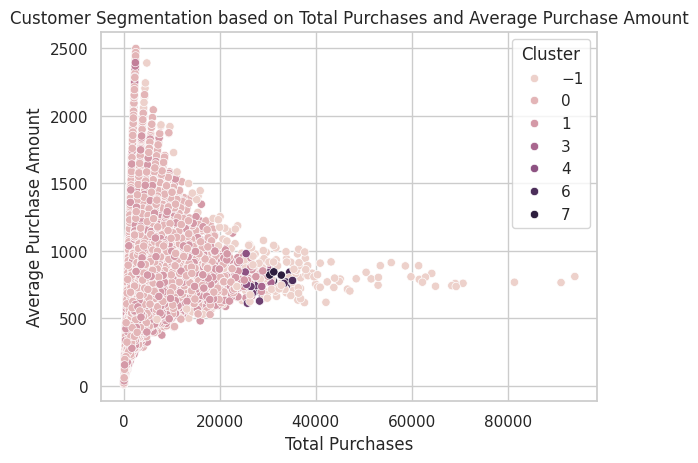

In [288]:
#DBSCAN
# Group data by 'Customer Name' and calculate aggregate metrics
customer_data = df.groupby('Customer Name').agg({
    'Total Price': ['sum', 'mean'],
    'Returns': 'sum',
    'Churn': 'max'
}).reset_index()
customer_data.columns = ['Customer Name', 'Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune 'eps' and 'min_samples' based on your data
customer_data['Cluster'] = dbscan.fit_predict(scaled_data_imputed)

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Total Returns': 'mean',
    'Churn Status': 'mean'
}).reset_index()

print(cluster_summary)

# Visualize the clusters
fig = sns.scatterplot(customer_data, x='Total Purchases', y='Average Purchase Amount',hue='Cluster')
plt.title('Customer Segmentation based on Total Purchases and Average Purchase Amount')
plt.show()


# ***SUPERVISED ML MODELS***

In [289]:
# Data Preparation
# Dropping columns not relevant for modeling or unsuitable for training (e.g., Customer Name)
df_model = df.drop(['Customer ID', 'Customer Name', 'Purchase Date'], axis=1)

# Encoding categorical variables
categorical_cols = df_model.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df_model[col] = label_encoders[col].fit_transform(df_model[col])

# Splitting features and targets
X = df_model.drop(columns=['Churn', 'Total Price'])  # Features
y_classification = df_model['Churn']  # Target for classification
y_regression = df_model['Total Price']  # Target for regression

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train-test sets for classification and regression
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_scaled, y_classification, test_size=0.3, random_state=42
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_regression, test_size=0.3, random_state=42
)

# Display data shape to verify
X_train_class.shape, X_test_class.shape, X_train_reg.shape, X_test_reg.shape


((175000, 9), (75000, 9), (175000, 9), (75000, 9))

In [290]:
# Initialize models for classification
models_classification = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models for classification
classification_results = {}

for model_name, model in models_classification.items():
    # Train the model
    model.fit(X_train_class, y_train_class)
    # Predictions
    y_pred = model.predict(X_test_class)
    # Metrics
    classification_results[model_name] = {
        'Accuracy': accuracy_score(y_test_class, y_pred),
        'Precision': precision_score(y_test_class, y_pred, zero_division=0),
        'Recall': recall_score(y_test_class, y_pred),
        'F1 Score': f1_score(y_test_class, y_pred),
        'ROC-AUC': roc_auc_score(y_test_class, model.predict_proba(X_test_class)[:, 1]) if hasattr(model, 'predict_proba') else None
    }

# Convert classification results to a DataFrame for better readability
classification_results_df = pd.DataFrame(classification_results).T
classification_results_df


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:17:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.799973,0.000000,0.000000,0.000000,0.502599
KNN,0.766040,0.203587,0.058259,0.090593,0.503566
Decision Tree,0.661187,0.201525,0.234235,0.216653,0.501102
Random Forest,0.794880,0.208841,0.009132,0.017499,0.509322
XGBoost,0.799667,0.151515,0.000333,0.000665,0.513246
